# Model Building

In part one we learnt how to work with disorganized data, how to move it around working with libraries like `os`, `regular expressions (re)`,`path` and `shutil`

What is left to do now os to rename the data and create some sort of inventory and label on the data we have so we can fit it properly in a CNN model for tuning and prediction


In [1]:
#these are the basic libraries we need when we are working with fiels and folders
import os
from os import path
import shutil

In [2]:
#lets pick one directory to play with first
src_="/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/train/train_cats"
src_1="/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/train/train_dogs"
#let's list five 10 file in there
print("The number of cat pictures in the training set is",len(os.listdir(src_)))
print("The number of dog pictures in the training set is",len(os.listdir(src_1)))

The number of cat pictures in the training set is 1729
The number of dog pictures in the training set is 3593


In [4]:
#let's sample a few file names
os.listdir(src_)[:5]

['.DS_Store', '.ipynb_checkpoints', 'cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg']

In [45]:
#let's try rename
#src_="/Users/drjamesmugume/Documents/GitHub/Cats And Dogs/test/dogs"
#dstn="/Users/drjamesmugume/Documents/GitHub/Cats And Dogs/test/test_dogs"

#first let's loop through the file names
#files = os.listdir(src_)

#loop and rename the files needed
#for index, file in enumerate(files):
#    os.rename(os.path.join(src_, file), os.path.join(dstn, "dog_"+str(index)+'.jpg'))



In [48]:
#now we want to create a label for the images
#let's begin with the cats directory
#first we create a list of labels equal to the length of the number of files
cat_label = []
src_cats="/Users/drjamesmugume/Documents/GitHub/Cats And Dogs/train/train_cats"
for i in range(len(os.listdir(src_cats))):
    cat_label.append('cat')


In [49]:
#how many pictures do we actually have?
len(cat_label)

1728

In [50]:
#now I an to get the path to the file
cat_path = []
src_cats="/Users/drjamesmugume/Documents/GitHub/Cats And Dogs/train/train_cats"
for filename in os.listdir(src_cats):
    cat_path.append(os.path.join(src_cats,filename))

In [53]:
import pandas as pd
#now let's make a csv file to keep this data
cat_annotation  = pd.DataFrame({
    'Path':cat_path,
    'Label':cat_label
})

In [58]:
os.chdir(src_cats)

In [59]:
!pwd

/Users/drjamesmugume/Documents/GitHub/Cats And Dogs/train/train_cats


In [60]:
cat_annotation.to_csv('cat_train.csv')

Now that we know the steps involved let us arrange them and form a function to help make the work faster

In [46]:
#step one
label = []
path = []
src_dogs="/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/test/Test"

def create_annotation():
       
    #now I can to get the path to the file
    #this is the file name
    for filename in os.listdir(src_dogs):
        path.append(os.path.join(src_dogs,filename))
        
        if filename.startswith('cat'):
            label.append('cat')
        else:
            label.append('dog')
    
    #step three
    #now let's make a csv file to keep this data
    dog_annotation=pd.DataFrame({
        'Path':path,
        'Label':label
    })

    #step four, change to the directory we need and create the csv file
    os.chdir(src_dogs)    
    
    dog_annotation.to_csv('train.csv')
    
    print("Done Here!")

In [47]:
#let's call the simple function above to help us
create_annotation()

Done Here!


Great! We are now done with the tough part of this process: We are now getting ready to begin modeling with the information that we have now, the data structure is ready to be fed into a convolution network.

In [67]:
# function to list files in each folder of the current working directory
os.chdir('/Users/drjamesmugume/Documents/GitHub/Cats And Dogs/')
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        # print(dirs)
        if dir!= '.git':
            level = root.replace(startpath, '').count(os.sep)
            indent = ' ' * 4 * (level)
            print('{}{}/'.format(indent, os.path.basename(root)))
            subindent = ' ' * 4 * (level + 1)
            for f in files:
                print('{}{}'.format(subindent, f))

In [68]:
startpath = os.getcwd()
list_files(startpath)

Cats And Dogs/
    .DS_Store
    Cats And Dogs Data Processing _1.ipynb
    Cats And Dogs Data Processing _2.ipynb
    list.txt
    README
    test.csv
    test.txt
    train.csv
    trainval.txt
    .ipynb_checkpoints/
        Cats And Dogs Data Processing _1-checkpoint.ipynb
        Cats And Dogs Data Processing _2-checkpoint.ipynb
    Data Copies/
        .DS_Store
        test/
            .DS_Store
            cats/
                Abyssinian_10.jpg
                Abyssinian_102.jpg
                Abyssinian_107.jpg
                Abyssinian_111.jpg
                Abyssinian_117.jpg
                Abyssinian_121.jpg
                Abyssinian_127.jpg
                Abyssinian_131.jpg
                Abyssinian_137.jpg
                Abyssinian_142.jpg
                Abyssinian_148.jpg
                Abyssinian_153.jpg
                Abyssinian_158.jpg
                Abyssinian_165.jpg
                Abyssinian_17.jpg
                Abyssinian_176.jpg
                A

                wheaten_terrier_173.jpg
                wheaten_terrier_178.jpg
                wheaten_terrier_183.jpg
                wheaten_terrier_188.jpg
                wheaten_terrier_193.jpg
                wheaten_terrier_199.jpg
                wheaten_terrier_22.jpg
                wheaten_terrier_28.jpg
                wheaten_terrier_32.jpg
                wheaten_terrier_38.jpg
                wheaten_terrier_42.jpg
                wheaten_terrier_48.jpg
                wheaten_terrier_52.jpg
                wheaten_terrier_58.jpg
                wheaten_terrier_63.jpg
                wheaten_terrier_68.jpg
                wheaten_terrier_73.jpg
                wheaten_terrier_78.jpg
                wheaten_terrier_83.jpg
                wheaten_terrier_88.jpg
                wheaten_terrier_93.jpg
                wheaten_terrier_98.jpg
                yorkshire_terrier_102.jpg
                yorkshire_terrier_108.jpg
                yorkshire_terrier_112.jpg
          

                Russian_Blue_95.jpg
                Russian_Blue_96.jpg
                Russian_Blue_99.jpg
                Siamese_100.jpg
                Siamese_101.jpg
                Siamese_102.jpg
                Siamese_104.jpg
                Siamese_106.jpg
                Siamese_108.jpg
                Siamese_110.jpg
                Siamese_112.jpg
                Siamese_113.jpg
                Siamese_114.jpg
                Siamese_115.jpg
                Siamese_117.jpg
                Siamese_119.jpg
                Siamese_122.jpg
                Siamese_125.jpg
                Siamese_127.jpg
                Siamese_128.jpg
                Siamese_129.jpg
                Siamese_130.jpg
                Siamese_133.jpg
                Siamese_136.jpg
                Siamese_137.jpg
                Siamese_138.jpg
                Siamese_14.jpg
                Siamese_140.jpg
                Siamese_141.jpg
                Siamese_142.jpg
                Siamese_145.j

                boxer_85.jpg
                boxer_86.jpg
                boxer_87.jpg
                boxer_88.jpg
                boxer_90.jpg
                boxer_91.jpg
                boxer_92.jpg
                boxer_93.jpg
                boxer_95.jpg
                boxer_96.jpg
                boxer_97.jpg
                boxer_98.jpg
                chihuahua_10.jpg
                chihuahua_100.jpg
                chihuahua_101.jpg
                chihuahua_102.jpg
                chihuahua_104.jpg
                chihuahua_105.jpg
                chihuahua_106.jpg
                chihuahua_108.jpg
                chihuahua_11.jpg
                chihuahua_110.jpg
                chihuahua_111.jpg
                chihuahua_112.jpg
                chihuahua_114.jpg
                chihuahua_115.jpg
                chihuahua_117.jpg
                chihuahua_118.jpg
                chihuahua_12.jpg
                chihuahua_120.jpg
                chihuahua_121.jpg
         

                japanese_chin_73.jpg
                japanese_chin_75.jpg
                japanese_chin_76.jpg
                japanese_chin_77.jpg
                japanese_chin_78.jpg
                japanese_chin_8.jpg
                japanese_chin_81.jpg
                japanese_chin_82.jpg
                japanese_chin_83.jpg
                japanese_chin_85.jpg
                japanese_chin_86.jpg
                japanese_chin_87.jpg
                japanese_chin_88.jpg
                japanese_chin_90.jpg
                japanese_chin_91.jpg
                japanese_chin_92.jpg
                japanese_chin_93.jpg
                japanese_chin_95.jpg
                japanese_chin_96.jpg
                japanese_chin_97.jpg
                japanese_chin_98.jpg
                keeshond_10.jpg
                keeshond_100.jpg
                keeshond_101.jpg
                keeshond_102.jpg
                keeshond_104.jpg
                keeshond_105.jpg
                keeshond_10

                saint_bernard_63.jpg
                saint_bernard_65.jpg
                saint_bernard_66.jpg
                saint_bernard_67.jpg
                saint_bernard_68.jpg
                saint_bernard_7.jpg
                saint_bernard_70.jpg
                saint_bernard_72.jpg
                saint_bernard_73.jpg
                saint_bernard_75.jpg
                saint_bernard_76.jpg
                saint_bernard_77.jpg
                saint_bernard_78.jpg
                saint_bernard_8.jpg
                saint_bernard_81.jpg
                saint_bernard_82.jpg
                saint_bernard_83.jpg
                saint_bernard_85.jpg
                saint_bernard_86.jpg
                saint_bernard_87.jpg
                saint_bernard_88.jpg
                saint_bernard_90.jpg
                saint_bernard_91.jpg
                saint_bernard_92.jpg
                saint_bernard_93.jpg
                saint_bernard_95.jpg
                saint_bernard_96.jpg
   

            cats/
                Abyssinian_1.jpg
                Abyssinian_105.jpg
                Abyssinian_114.jpg
                Abyssinian_123.jpg
                Abyssinian_132.jpg
                Abyssinian_141.jpg
                Abyssinian_151.jpg
                Abyssinian_160.jpg
                Abyssinian_172.jpg
                Abyssinian_181.jpg
                Abyssinian_195.jpg
                Abyssinian_207.jpg
                Abyssinian_220.jpg
                Abyssinian_25.jpg
                Abyssinian_36.jpg
                Abyssinian_49.jpg
                Abyssinian_6.jpg
                Abyssinian_7.jpg
                Abyssinian_79.jpg
                Abyssinian_88.jpg
                Abyssinian_97.jpg
                Bengal_105.jpg
                Bengal_114.jpg
                Bengal_123.jpg
                Bengal_132.jpg
                Bengal_141.jpg
                Bengal_150.jpg
                Bengal_16.jpg
                Bengal_169.jpg
            

                saint_bernard_18.jpg
                saint_bernard_189.jpg
                saint_bernard_198.jpg
                saint_bernard_26.jpg
                saint_bernard_35.jpg
                saint_bernard_44.jpg
                saint_bernard_53.jpg
                saint_bernard_62.jpg
                saint_bernard_71.jpg
                saint_bernard_80.jpg
                saint_bernard_9.jpg
                saint_bernard_99.jpg
                samoyed_107.jpg
                samoyed_116.jpg
                samoyed_125.jpg
                samoyed_134.jpg
                samoyed_143.jpg
                samoyed_152.jpg
                samoyed_161.jpg
                samoyed_170.jpg
                samoyed_18.jpg
                samoyed_189.jpg
                samoyed_199.jpg
                samoyed_26.jpg
                samoyed_35.jpg
                samoyed_44.jpg
                samoyed_53.jpg
                samoyed_62.jpg
                samoyed_71.jpg
                sa

            dog_335.jpg
            dog_336.jpg
            dog_337.jpg
            dog_338.jpg
            dog_339.jpg
            dog_34.jpg
            dog_340.jpg
            dog_341.jpg
            dog_342.jpg
            dog_343.jpg
            dog_344.jpg
            dog_345.jpg
            dog_346.jpg
            dog_347.jpg
            dog_348.jpg
            dog_349.jpg
            dog_35.jpg
            dog_350.jpg
            dog_351.jpg
            dog_352.jpg
            dog_353.jpg
            dog_354.jpg
            dog_355.jpg
            dog_356.jpg
            dog_357.jpg
            dog_358.jpg
            dog_359.jpg
            dog_36.jpg
            dog_360.jpg
            dog_361.jpg
            dog_362.jpg
            dog_363.jpg
            dog_364.jpg
            dog_365.jpg
            dog_366.jpg
            dog_367.jpg
            dog_368.jpg
            dog_369.jpg
            dog_37.jpg
            dog_370.jpg
            dog_371.jpg
            dog_372.

        train_cats/
            cat_0.jpg
            cat_1.jpg
            cat_10.jpg
            cat_100.jpg
            cat_1000.jpg
            cat_1001.jpg
            cat_1002.jpg
            cat_1003.jpg
            cat_1004.jpg
            cat_1005.jpg
            cat_1006.jpg
            cat_1007.jpg
            cat_1008.jpg
            cat_1009.jpg
            cat_101.jpg
            cat_1010.jpg
            cat_1011.jpg
            cat_1012.jpg
            cat_1013.jpg
            cat_1014.jpg
            cat_1015.jpg
            cat_1016.jpg
            cat_1017.jpg
            cat_1018.jpg
            cat_1019.jpg
            cat_102.jpg
            cat_1020.jpg
            cat_1021.jpg
            cat_1022.jpg
            cat_1023.jpg
            cat_1024.jpg
            cat_1025.jpg
            cat_1026.jpg
            cat_1027.jpg
            cat_1028.jpg
            cat_1029.jpg
            cat_103.jpg
            cat_1030.jpg
            cat_1031.jpg
            cat_1

            cat_367.jpg
            cat_368.jpg
            cat_369.jpg
            cat_37.jpg
            cat_370.jpg
            cat_371.jpg
            cat_372.jpg
            cat_373.jpg
            cat_374.jpg
            cat_375.jpg
            cat_376.jpg
            cat_377.jpg
            cat_378.jpg
            cat_379.jpg
            cat_38.jpg
            cat_380.jpg
            cat_381.jpg
            cat_382.jpg
            cat_383.jpg
            cat_384.jpg
            cat_385.jpg
            cat_386.jpg
            cat_387.jpg
            cat_388.jpg
            cat_389.jpg
            cat_39.jpg
            cat_390.jpg
            cat_391.jpg
            cat_392.jpg
            cat_393.jpg
            cat_394.jpg
            cat_395.jpg
            cat_396.jpg
            cat_397.jpg
            cat_398.jpg
            cat_399.jpg
            cat_4.jpg
            cat_40.jpg
            cat_400.jpg
            cat_401.jpg
            cat_402.jpg
            cat_403.jp

            dog_1264.jpg
            dog_1265.jpg
            dog_1266.jpg
            dog_1267.jpg
            dog_1268.jpg
            dog_1269.jpg
            dog_127.jpg
            dog_1270.jpg
            dog_1271.jpg
            dog_1272.jpg
            dog_1273.jpg
            dog_1274.jpg
            dog_1275.jpg
            dog_1276.jpg
            dog_1277.jpg
            dog_1278.jpg
            dog_1279.jpg
            dog_128.jpg
            dog_1280.jpg
            dog_1281.jpg
            dog_1282.jpg
            dog_1283.jpg
            dog_1284.jpg
            dog_1285.jpg
            dog_1286.jpg
            dog_1287.jpg
            dog_1288.jpg
            dog_1289.jpg
            dog_129.jpg
            dog_1290.jpg
            dog_1291.jpg
            dog_1292.jpg
            dog_1293.jpg
            dog_1294.jpg
            dog_1295.jpg
            dog_1296.jpg
            dog_1297.jpg
            dog_1298.jpg
            dog_1299.jpg
            dog_13.jpg
     

            dog_2163.jpg
            dog_2164.jpg
            dog_2165.jpg
            dog_2166.jpg
            dog_2167.jpg
            dog_2168.jpg
            dog_2169.jpg
            dog_217.jpg
            dog_2170.jpg
            dog_2171.jpg
            dog_2172.jpg
            dog_2173.jpg
            dog_2174.jpg
            dog_2175.jpg
            dog_2176.jpg
            dog_2177.jpg
            dog_2178.jpg
            dog_2179.jpg
            dog_218.jpg
            dog_2180.jpg
            dog_2181.jpg
            dog_2182.jpg
            dog_2183.jpg
            dog_2184.jpg
            dog_2185.jpg
            dog_2186.jpg
            dog_2187.jpg
            dog_2188.jpg
            dog_2189.jpg
            dog_219.jpg
            dog_2190.jpg
            dog_2191.jpg
            dog_2192.jpg
            dog_2193.jpg
            dog_2194.jpg
            dog_2195.jpg
            dog_2196.jpg
            dog_2197.jpg
            dog_2198.jpg
            dog_2199.jpg
   

            dog_3063.jpg
            dog_3064.jpg
            dog_3065.jpg
            dog_3066.jpg
            dog_3067.jpg
            dog_3068.jpg
            dog_3069.jpg
            dog_307.jpg
            dog_3070.jpg
            dog_3071.jpg
            dog_3072.jpg
            dog_3073.jpg
            dog_3074.jpg
            dog_3075.jpg
            dog_3076.jpg
            dog_3077.jpg
            dog_3078.jpg
            dog_3079.jpg
            dog_308.jpg
            dog_3080.jpg
            dog_3081.jpg
            dog_3082.jpg
            dog_3083.jpg
            dog_3084.jpg
            dog_3085.jpg
            dog_3086.jpg
            dog_3087.jpg
            dog_3088.jpg
            dog_3089.jpg
            dog_309.jpg
            dog_3090.jpg
            dog_3091.jpg
            dog_3092.jpg
            dog_3093.jpg
            dog_3094.jpg
            dog_3095.jpg
            dog_3096.jpg
            dog_3097.jpg
            dog_3098.jpg
            dog_3099.jpg
   

            dog_730.jpg
            dog_731.jpg
            dog_732.jpg
            dog_733.jpg
            dog_734.jpg
            dog_735.jpg
            dog_736.jpg
            dog_737.jpg
            dog_738.jpg
            dog_739.jpg
            dog_74.jpg
            dog_740.jpg
            dog_741.jpg
            dog_742.jpg
            dog_743.jpg
            dog_744.jpg
            dog_745.jpg
            dog_746.jpg
            dog_747.jpg
            dog_748.jpg
            dog_749.jpg
            dog_75.jpg
            dog_750.jpg
            dog_751.jpg
            dog_752.jpg
            dog_753.jpg
            dog_754.jpg
            dog_755.jpg
            dog_756.jpg
            dog_757.jpg
            dog_758.jpg
            dog_759.jpg
            dog_76.jpg
            dog_760.jpg
            dog_761.jpg
            dog_762.jpg
            dog_763.jpg
            dog_764.jpg
            dog_765.jpg
            dog_766.jpg
            dog_767.jpg
            dog_768

            dog_59.jpg
            dog_6.jpg
            dog_60.jpg
            dog_61.jpg
            dog_62.jpg
            dog_63.jpg
            dog_64.jpg
            dog_65.jpg
            dog_66.jpg
            dog_67.jpg
            dog_68.jpg
            dog_69.jpg
            dog_7.jpg
            dog_70.jpg
            dog_71.jpg
            dog_72.jpg
            dog_73.jpg
            dog_74.jpg
            dog_75.jpg
            dog_76.jpg
            dog_77.jpg
            dog_78.jpg
            dog_79.jpg
            dog_8.jpg
            dog_80.jpg
            dog_81.jpg
            dog_82.jpg
            dog_83.jpg
            dog_84.jpg
            dog_85.jpg
            dog_86.jpg
            dog_87.jpg
            dog_88.jpg
            dog_89.jpg
            dog_9.jpg
            dog_90.jpg
            dog_91.jpg
            dog_92.jpg
            dog_93.jpg
            dog_94.jpg
            dog_95.jpg
            dog_96.jpg
            dog_97.jpg
            dog

# Modeling

From Here onwards we are going to go through the process of modeling since the pictures are all organized properly;

In [1]:
#lets import the necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#lets read in the csv files that we just created
train =pd.read_csv("/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/train/train.csv")
valid =pd.read_csv("/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/valid/train.csv")
test =pd.read_csv("/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/test/train.csv")

In [3]:
test.head()

,Unnamed: 0,Label,Path
0,0,cat,/Users/drjamesmugume/Documents/GitHub/Data Lib...
1,1,cat,/Users/drjamesmugume/Documents/GitHub/Data Lib...
2,2,cat,/Users/drjamesmugume/Documents/GitHub/Data Lib...
3,3,cat,/Users/drjamesmugume/Documents/GitHub/Data Lib...
4,4,cat,/Users/drjamesmugume/Documents/GitHub/Data Lib...


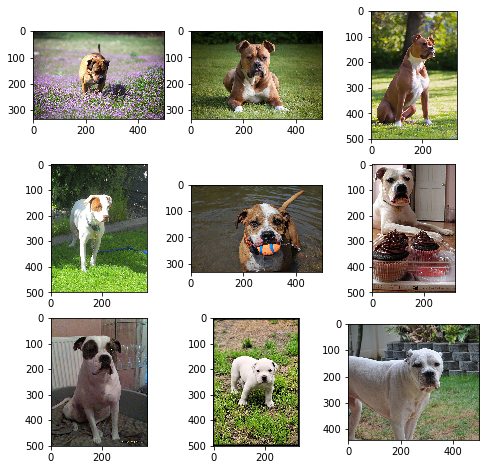

In [4]:
#let's have a look at a few images
from matplotlib import pyplot
from matplotlib.image import imread
plt.figure(figsize=(8,8))
# define location of dataset
folder = "/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/train/Train/"
# plot first few images
for i in range(0,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog_' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [7]:
from PIL import Image
import os
DIR = '/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/train/train_dogs/'

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

Average Height: 390.86581291759467
Max Height: 500
Min Height: 149


Average Width: 435.45601336302894
Max Width: 500
Min Width: 117


In [8]:
#I have discovered how to add the labels and the images using keras
#let's put the paths of train
train_batch = '/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/train/Train/'
valid_batch = '/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/valid/Valid/'
test_batch = '/Users/drjamesmugume/Documents/GitHub/Data Lib/Cats And Dogs/test/Test/'


In [9]:
#now let's create the train batches using image data generator
from keras_preprocessing.image import ImageDataGenerator

In [13]:
datagen=ImageDataGenerator(rescale=1./255)
train_bt=datagen.flow_from_dataframe(dataframe=train, directory=train_batch, x_col="Path", y_col="Label", class_mode="binary",classes=['dog','cat'] ,target_size=(32,32), batch_size=32)
valid_bt=datagen.flow_from_dataframe(dataframe=valid, directory=valid_batch, x_col="Path", y_col="Label", class_mode="binary",classes=['dog','cat'] ,target_size=(32,32), batch_size=32)
test_bt=datagen.flow_from_dataframe(dataframe=test, directory=test_batch, x_col="Path", y_col="Label", class_mode="binary",classes=['dog','cat'] ,target_size=(32,32), batch_size=32)

Found 5319 validated image filenames belonging to 2 classes.
Found 740 validated image filenames belonging to 2 classes.
Found 1332 validated image filenames belonging to 2 classes.


## Building a Convolution Neural Net

We have gone through the processes of setting up the data and now we are ready to build a CNN to help us to classify the images.

We shall go through steps to build a convolution neural net by trying as many models as we can so that we can learn from experimenting.

We will begin with a few laters with 3 epochs and see how to proceed.

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

model = Sequential()
model.add(Conv2D(1024, (3, 3), padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

In [35]:
#let's compile the model first
model.compile(optimizers.rmsprop(lr=0.0001),loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#now let's fit the model
STEP_SIZE_TRAIN=train_bt.n//train_bt.batch_size
STEP_SIZE_VALID=valid_bt.n//valid_bt.batch_size
model.fit_generator(generator=train_bt,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_bt,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=3)